In [1]:
from CFD_2D_TDJ import *

In [11]:
# Create field
n_bits = 4
N = 2**n_bits
L = 1
chi = 16
chi_mpo = 16

# Set timesteps
dt = 0.1*2**-(n_bits-1)
T = 0.5

# Set penalty factor for breach of incompressibility condition
dx = 1 / (2**n_bits - 1)
mu = 2.5 * 10**5
Re = 0.001*200*1e3
# Re = 200*1e3

In [12]:
U_MPS, V_MPS, U_arrays, V_arrays = build_initial_fields(n_bits, L, chi)

Step = 0 - Time = 0

Run: 2, Diff: 1.1300525658558445e-15, E_0: 62.87696318108629, E_1: 62.87696318108636

Step = 1 - Time = 0.0125

Run: 2, Diff: 1.1486399575814128e-16, E_0: 61.859482692577195, E_1: 61.8594826925772

Step = 2 - Time = 0.025

Run: 2, Diff: -4.664849385932393e-16, E_0: 60.927389244579395, E_1: 60.927389244579366

Step = 3 - Time = 0.037500000000000006

Run: 2, Diff: 4.731501781542417e-16, E_0: 60.069108588898914, E_1: 60.06910858889894

Step = 4 - Time = 0.05

Run: 2, Diff: -4.794899745016514e-16, E_0: 59.274877352636125, E_1: 59.274877352636096

Step = 5 - Time = 0.0625

Run: 2, Diff: 2.4276934068781884e-16, E_0: 58.5364472916536, E_1: 58.536447291653616

Step = 6 - Time = 0.075

Run: 2, Diff: 1.228317304228588e-15, E_0: 57.846839193260216, E_1: 57.84683919326029

Step = 7 - Time = 0.0875

Run: 2, Diff: -3.7266139133880816e-16, E_0: 57.20013548015532, E_1: 57.200135480155296

Step = 8 - Time = 0.09999999999999999

Run: 2, Diff: -2.511137318487673e-16, E_0: 56.59130868

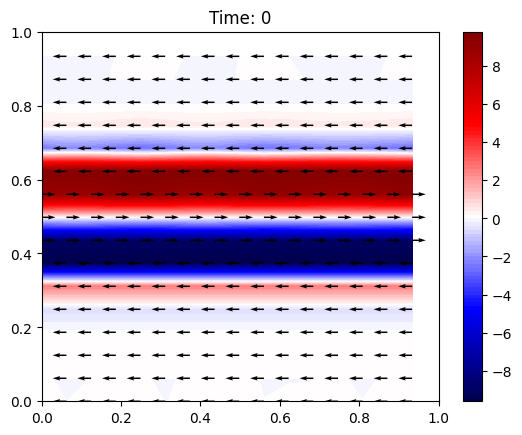

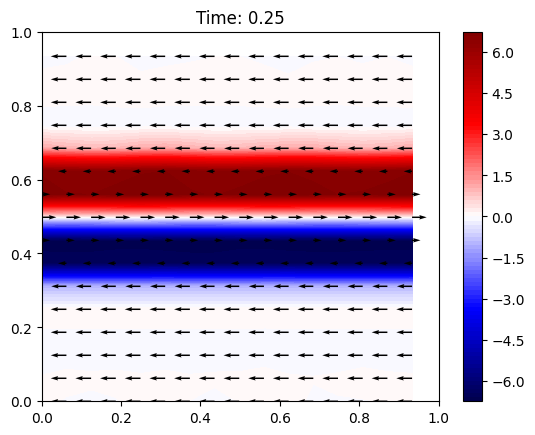

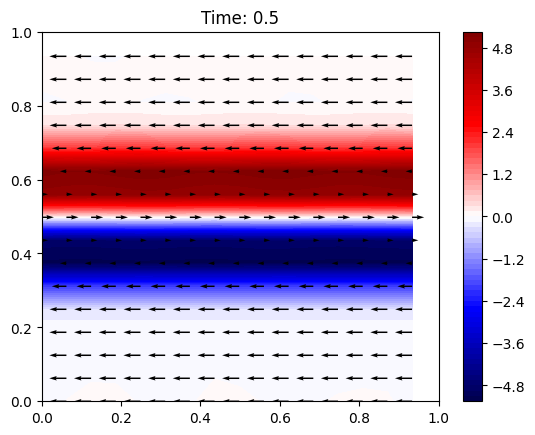

In [13]:
time_evolution(U_MPS, V_MPS, chi_mpo, dt, T, Re, mu, '/Users/Q556220/dev/TN_CFD/2D_TDJ/numpy/data', 'cg')

In [4]:
U_MPS

[array([[[-5.00110132e-01,  4.99889666e-01, -5.88043904e-04,
          -7.07106662e-01],
         [-4.99069814e-01, -5.00119131e-01, -7.07679430e-01,
           2.30754544e-06],
         [-5.00109800e-01,  4.99889667e-01, -5.83667245e-04,
           7.07106901e-01],
         [-5.00708862e-01, -5.00101487e-01,  7.06533182e-01,
          -2.06872552e-06]]]),
 array([[[-2.14462536e-01, -5.48008475e-01,  1.69331117e-01,
           2.17751993e-02, -6.59061406e-02, -4.95011868e-01,
          -4.43399033e-01,  1.15059662e-02, -5.99422063e-03,
          -1.27888670e-01, -1.09406595e-01,  3.85672047e-01,
          -3.51774589e-02, -8.97503915e-03,  2.77652798e-03,
           2.12175509e-08],
         [-5.47241149e-01,  6.83166936e-02,  2.66285653e-01,
           4.71612817e-04,  2.51255495e-03, -1.81186279e-04,
           1.66756794e-01,  3.22182639e-02, -1.08062295e-01,
           8.89106628e-02,  7.39615594e-01,  1.14917492e-01,
           1.23471634e-01, -3.21303804e-02, -1.43628311e-03,
   

In [5]:
d1x = Diff_1_2_x_MPO(n_bits, 1)

In [6]:
d1x_d1x = multiply_mpo_mpo(d1x, d1x, chi_mpo)

In [7]:
for tensor in d1x_d1x:
    print(tensor.shape)

(1, 4, 16, 4)
(16, 4, 16, 4)
(16, 4, 16, 4)
(16, 4, 1, 4)


In [8]:
d1x_d1x

[array([[[[-5.00000000e-01,  0.00000000e+00,  0.00000000e+00,
            0.00000000e+00],
          [-1.38666956e-32,  2.90319224e-17,  5.00000000e-01,
            0.00000000e+00],
          [ 8.66025404e-01,  0.00000000e+00,  0.00000000e+00,
            0.00000000e+00],
          [-1.66533454e-16,  1.06158984e-02, -3.19715887e-02,
           -2.10608320e-01],
          [ 4.16333634e-17, -8.96238438e-04, -2.04990748e-01,
           -9.47877517e-01],
          [-2.92734587e-17,  2.10431171e-01, -8.21945393e-01,
            2.34040671e-01],
          [-1.16443313e-16,  9.77550088e-01,  1.77094177e-01,
           -4.89623276e-02],
          [ 8.32667268e-17,  1.90595570e-05,  3.45285280e-06,
           -9.54631671e-07],
          [-1.86770765e-19,  1.02295701e-03,  1.85320152e-04,
           -5.12366140e-05],
          [ 1.84889275e-32,  1.86622128e-17, -1.65519739e-17,
            2.07724839e-17],
          [ 9.24446373e-33,  1.02967661e-18, -7.40692655e-17,
            2.44639873e-17],

In [9]:
test = np.arange(2**8).reshape((2**4, 2**4))

In [10]:
np.gradient(np.gradient(test)[0])

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0

In [11]:
test_MPS = convert_MPS_to_numpy(convert_to_MPS2D(test), 4)

In [12]:
convert_to_VF2D(convert_numpy_to_MPS(multiply_mps_mpo(test_MPS, d1x_d1x, chi_mpo)))

array([[ 6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01],
       [ 6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01,  6.40000000e+01,  6.40000000e+01,
         6.40000000e+01],
       [-3.01603426e-15,  7.27248440e-15,  7.00933860e-14,
         8.01612487e-14,  3.68559761e-14,  3.15635381e-14,
         1.05143173e-13,  1.16262213e-13, -3.60307702e-14,
        -3.44561498e-14,  4.41676235e-14,  5.40719199e-14,
         1.93764670e-13,  1.89963739e-13,  8.45114239e-14,
         9.10290819e-14],
       [ 5.36730926e-14,  6.18043192e

In [4]:
u_0 = np.load('u_0.npy')
u_1 = np.load('u_1.npy')
u_2 = np.load('u_2.npy')
u_3 = np.load('u_3.npy')
u_compare = [u_0, u_1, u_2, u_3]

In [15]:
np.max(convert_to_VF2D(convert_numpy_to_MPS(u_compare)) - convert_to_VF2D(convert_numpy_to_MPS(U_MPS)))

1.0602629885170245e-14

In [13]:
convert_to_VF2D(convert_numpy_to_MPS(U_MPS))

array([[-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.49997669,  0.49999933,  0.5       ,  0.49999989,
        -0.49986211, -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.49998087,  0.49999933,  0.5       ,  0.49999989,
        -0.47914726, -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.49998018,  0.49999933,  0.5       ,  0.49999989,
        -0.48255641, -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       ],
       [-0.5       , -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       , -0.49997502,  0.49999933,  0.5       ,  0.49999989,
        -0.50817175, -0.5       , -0.5       , -0.5       , -0.5       ,
        -0.5       ],
       [-0.5       , -0.5       , -0

In [19]:
u_squared = multiply_mps_mpo(U_MPS.copy(), hadamard_product_MPO(U_MPS.copy()))

In [20]:
convert_to_VF2D(convert_numpy_to_MPS(u_squared))

array([[0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.24997669, 0.24999933, 0.25      , 0.24999989,
        0.24986213, 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.24998087, 0.24999933, 0.25      , 0.24999989,
        0.2295821 , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.24998018, 0.24999933, 0.25      , 0.24999989,
        0.23286068, 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.24997502, 0.24999933, 0.25      , 0.24999989,
        0.25823853, 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      ],
       [0.25      , 0.25      , 0.25      , 0.25      , 0.25      ,
        0.25      , 0.24997166, 

In [24]:
np.max(convert_to_VF2D(convert_numpy_to_MPS(U_MPS))**2 - convert_to_VF2D(convert_numpy_to_MPS(u_squared)))

1.5543122344752192e-15

In [32]:
right_canonicalize_mps(u_compare, 0, 3)

[array([[[-5.00110132e-01,  4.99889666e-01, -5.88043904e-04,
          -7.07106662e-01],
         [-4.99069814e-01, -5.00119131e-01, -7.07679430e-01,
           2.30754544e-06],
         [-5.00109800e-01,  4.99889667e-01, -5.83667245e-04,
           7.07106901e-01],
         [-5.00708862e-01, -5.00101487e-01,  7.06533182e-01,
          -2.06872552e-06]]]),
 array([[[-2.14462536e-01,  5.48008475e-01, -1.69331117e-01,
           2.17751993e-02, -6.59061406e-02,  4.95011868e-01,
           2.08166092e-03, -3.29654368e-02,  5.70516368e-01,
          -1.76515482e-03, -5.53405442e-02, -1.36484534e-01,
          -1.38400940e-01,  8.79518088e-02,  9.67850840e-04,
           1.05604565e-05],
         [-5.47241149e-01, -6.83166936e-02, -2.66285653e-01,
           4.71612817e-04,  2.51255495e-03,  1.81186279e-04,
          -5.40444510e-02, -1.09599450e-01, -9.57503058e-02,
           6.68270649e-01,  2.86104623e-01,  1.60495066e-01,
           1.60122994e-01, -1.44837333e-01, -5.19276193e-03,
   

In [8]:
U_0 = canonical_center(u_compare, 0)

In [9]:
np.einsum('apb, apb->', U_0[0], U_0[0])

63.995755865600074

In [16]:
canonicalize_mps_tensors(u_compare[0], u_compare[1])

(array([[[-5.00110132e-01,  4.99889666e-01, -5.88043904e-04,
          -7.07106662e-01],
         [-4.99069814e-01, -5.00119131e-01, -7.07679430e-01,
           2.30754544e-06],
         [-5.00109800e-01,  4.99889667e-01, -5.83667245e-04,
           7.07106901e-01],
         [-5.00708862e-01, -5.00101487e-01,  7.06533182e-01,
          -2.06872552e-06]]]),
 array([[[ 2.14462536e-01,  5.48008475e-01, -1.69331117e-01,
          -2.17751993e-02,  6.59061406e-02,  4.95011868e-01,
          -2.08166092e-03, -3.29654368e-02,  5.70516368e-01,
           1.76515482e-03,  5.53405442e-02, -1.36484534e-01,
          -1.38400940e-01,  8.79518088e-02,  9.67850840e-04,
           1.05604565e-05],
         [ 5.47241149e-01, -6.83166936e-02, -2.66285653e-01,
          -4.71612817e-04, -2.51255495e-03,  1.81186279e-04,
           5.40444510e-02, -1.09599450e-01, -9.57503058e-02,
          -6.68270649e-01, -2.86104623e-01,  1.60495066e-01,
           1.60122994e-01, -1.44837333e-01, -5.19276193e-03,
   